## Trying to interpret singular vectors

In [1]:
%run ../imports.py

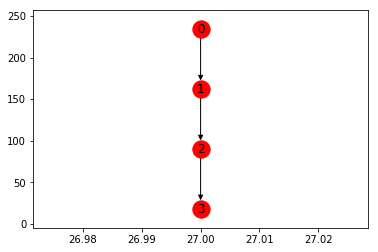

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
#    (0,1),
    (1,2),
    (2,3)
#    (3,0)
])
G.add_edge(0,1,weight=1.1)
N = nx.number_of_nodes(G)
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

In [4]:
L

matrix([[ 1.1, -1.1,  0. ,  0. ],
        [ 0. ,  1. , -1. ,  0. ],
        [ 0. ,  0. ,  1. , -1. ],
        [ 0. ,  0. ,  0. ,  0. ]])

### Symmetrization

In [5]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [6]:
print(eqL)

[[ 5.50000000e-01 -5.50000000e-01 -2.64722328e-16 -5.95218455e-16]
 [-5.50000000e-01  1.05000000e+00 -5.00000000e-01  6.53096680e-16]
 [ 4.70301530e-16 -5.00000000e-01  1.00000000e+00 -5.00000000e-01]
 [-5.18707268e-16  4.01767622e-16 -5.00000000e-01  5.00000000e-01]]


Create undirected graph from the equivalent Laplacian

In [7]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [8]:
print(eqL)

[[ 5.50000000e-01 -5.50000000e-01 -2.64722328e-16 -5.95218455e-16]
 [-5.50000000e-01  1.05000000e+00 -5.00000000e-01  6.53096680e-16]
 [ 4.70301530e-16 -5.00000000e-01  1.00000000e+00 -5.00000000e-01]
 [-5.18707268e-16  4.01767622e-16 -5.00000000e-01  5.00000000e-01]]


In [9]:
np.linalg.matrix_rank(eqL)

3

In [10]:
posG, negG = separate_graphs(eqL)

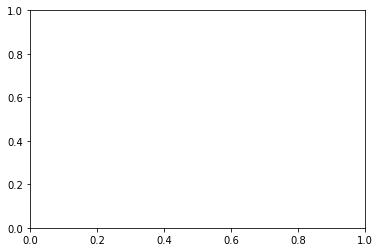

In [11]:
nx.draw_networkx(negG)

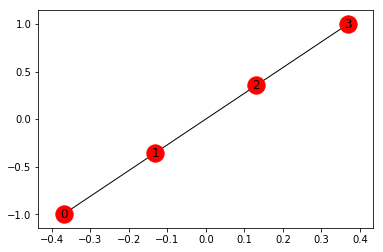

In [13]:
nx.draw_networkx(posG)

In [14]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [15]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [16]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([-1.50000000e+00, -5.00000000e-01, -5.68561446e-17]),
 matrix([[ 4.08248290e-01,  7.07106781e-01,  5.77350269e-01],
         [-8.16496581e-01, -6.17587341e-16,  5.77350269e-01],
         [ 4.08248290e-01, -7.07106781e-01,  5.77350269e-01]]))

In [17]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.5,  0.5,  0. ],
        [ 0.5, -1. ,  0.5],
        [ 0. ,  0.5, -0.5]])